In [4]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import math
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
import interpolation 
import numpy as np
import scipy as sc
import scipy.stats as scs
import scipy.integrate as integrate
import scipy.optimize as opt
from scipy.special import erf
import random as rd
import matplotlib.pyplot as plt
import math
ser = Ncm.Serialize.new(0)
Ncm.cfg_init()


In [5]:


cosmo = Nc.HICosmo.new_from_name (Nc.HICosmo, 'NcHICosmoLCDM')
mset = Ncm.MSet ()
mset.set (cosmo)

#
#  Setting parameters Omega_c and w to be fitted.
#
cosmo.props.Omegac_fit = True
cosmo.props.Omegax_fit = True
cosmo.props.H0_fit = True

#
#  Creating a new Distance object optimized to redshift 2.
#
dist = Nc.Distance (zf = 2.0)

#
#  Creating a new Data object from distance modulus catalogs.
#
snia = Nc.DataDistMu.new_from_id (dist, Nc.DataSNIAId.SIMPLE_LEGACY)

#
#  Creating a new Dataset and add snia to it.
#
dset = Ncm.Dataset ()
dset.append_data (snia)

#
#  Creating a Likelihood from the Dataset.
#
lh = Ncm.Likelihood (dataset = dset)

#
#  Creating a Fit object of type NLOPT using the fitting algorithm ln-neldermead to
#  fit the Modelset mset using the Likelihood lh and using a numerical differentiation
#  algorithm (NUMDIFF_FORWARD) to obtain the gradient (if needed).
#
fit = Ncm.Fit.new (Ncm.FitType.NLOPT, "ln-neldermead", lh, mset, Ncm.FitGradType.NUMDIFF_FORWARD)

#
#  Running the fitter printing messages.
##
fit.run (Ncm.FitRunMsgs.SIMPLE)

#
#  Printing fitting informations.
#
fit.log_info ()

#
#  Calculating the parameters covariance using numerical differentiation.
#
fit.numdiff_m2lnL_covar ()

#
#  Printing the covariance matrix.
#
fit.log_covar ()

/tmp/ipykernel_2689/201909576.py:20: Warning: unable to set property 'w-mean' of type 'gboolean' from value of type 'gchararray'
  snia = Nc.DataDistMu.new_from_id (dist, Nc.DataSNIAId.SIMPLE_LEGACY)


#----------------------------------------------------------------------------------
# Model fitting. Interating using:
#  - solver:            NLOpt:ln-neldermead
#  - differentiation:   Numerical differentiantion (forward)
#....................
#  Minimum found with precision: |df|/f =  1.00000e-08 and |dx| =  1.00000e-05
#  Elapsed time: 00 days, 00:00:00.3552910
#  iteration            [000116]
#  function evaluations [000118]
#  gradient evaluations [000000]
#  degrees of freedom   [000112]
#  m2lnL     =     110.950177682567 (     110.95018 )
#  Fit parameters:
#     70.1266932058548     0.264955145171665    0.804953011622957   
#----------------------------------------------------------------------------------
# Data used:
#   - Legacy sample
#----------------------------------------------------------------------------------
# Model[03000]:
#   - NcHICosmo : \Lambda{}CDM
#----------------------------------------------------------------------------------
# Model parameters
#   -  

#----------------------------------------------------------------------------------
# Likelihood ratio confidence region at 68.270%, bestfit [  0.26495515    70.126693]:
#
#  looking root in interval [           0    1.5151948]:
#..
#  root found at    1.5076229 with precision 1.00000000e-02.
#  border found at    1.5076229.
#.
#  looking root in interval [   7.0669608    8.6377572]:
#..
#  root found at    7.9512583 with precision 1.00000000e-02.
#  looking root in interval [   7.1658601    8.7366564]:
#..
#  root found at    7.9760241 with precision 1.00000000e-02.
#  looking root in interval [    7.190626    8.7614223]:
#..
#  root found at    8.0040481 with precision 1.00000000e-02.
#  looking root in interval [     7.21865    8.7894463]:
#..
#  root found at     8.030496 with precision 1.00000000e-02.
#  looking root in interval [   7.2450978    8.8158941]:
#..
#  root found at    8.0567373 with precision 1.00000000e-02.
#  looking root in interval [   7.2713391    8.8421355]:
#..

#..
#  root found at    9.1798345 with precision 1.00000000e-02.
#  looking root in interval [   8.3944363    9.9652326]:
#..
#  root found at    9.1988292 with precision 1.00000000e-02.
#  looking root in interval [    8.413431    9.9842274]:
#..
#  root found at    9.2180941 with precision 1.00000000e-02.
#  looking root in interval [   8.4326959    10.003492]:
#..
#  root found at    9.2376628 with precision 1.00000000e-02.
#  looking root in interval [   8.4522647    10.023061]:
#..
#  root found at    9.2575459 with precision 1.00000000e-02.
#  looking root in interval [   8.4721477    10.042944]:
#..
#  root found at    9.2777578 with precision 1.00000000e-02.
#  looking root in interval [   8.4923597    10.063156]:
#..
#  root found at    9.2982931 with precision 1.00000000e-02.
#  looking root in interval [   8.5128949    10.083691]:
#..
#  root found at    9.3191751 with precision 1.00000000e-02.
#  looking root in interval [    8.533777    10.104573]:
#..
#  root found at    

#  looking root in interval [   9.9338334     11.50463]:
#..
#  root found at    10.736503 with precision 1.00000000e-02.
#  looking root in interval [   9.9511048    11.521901]:
#..
#  root found at    10.753615 with precision 1.00000000e-02.
#  looking root in interval [   9.9682173    11.539014]:
#..
#  root found at    10.770573 with precision 1.00000000e-02.
#  looking root in interval [   9.9851749    11.555971]:
#..
#  root found at    10.787371 with precision 1.00000000e-02.
#  looking root in interval [   10.001973    11.572769]:
#..
#  root found at    10.804057 with precision 1.00000000e-02.
#  looking root in interval [   10.018659    11.589455]:
#..
#  root found at    10.820616 with precision 1.00000000e-02.
#  looking root in interval [   10.035218    11.606014]:
#..
#  root found at    10.837064 with precision 1.00000000e-02.
#  looking root in interval [   10.051666    11.622462]:
#..
#  root found at    10.853427 with precision 1.00000000e-02.
#  looking root in inter

#.......
#  root found at    12.249361 with precision 1.00000000e-02.
#  looking root in interval [   11.463963    13.034759]:
#.......
#  root found at    12.151175 with precision 1.00000000e-02.
#  looking root in interval [   11.365777    12.936573]:
#.......
#  root found at    12.052989 with precision 1.00000000e-02.
#  looking root in interval [   11.267591    12.838387]:
#......
#  root found at    12.151154 with precision 1.00000000e-02.
#  looking root in interval [   11.365755    12.936552]:
#.......
#  root found at    12.052968 with precision 1.00000000e-02.
#  looking root in interval [    11.26757    12.838366]:
#......
#  root found at    12.151133 with precision 1.00000000e-02.
#  looking root in interval [   11.365735    12.936531]:
#.......
#  root found at    12.052947 with precision 1.00000000e-02.
#  looking root in interval [   11.267549    12.838346]:
#......
#  root found at    12.151113 with precision 1.00000000e-02.
#  looking root in interval [   11.365715   

#..
#  root found at    13.512197 with precision 1.00000000e-02.
#  looking root in interval [   12.726798    14.297595]:
#..
#  root found at    13.532379 with precision 1.00000000e-02.
#  looking root in interval [   12.746981    14.317777]:
#..
#  root found at    13.552978 with precision 1.00000000e-02.
#  looking root in interval [    12.76758    14.338376]:
#..
#  root found at    13.573982 with precision 1.00000000e-02.
#  looking root in interval [   12.788583     14.35938]:
#..
#  root found at    13.595083 with precision 1.00000000e-02.
#  looking root in interval [   12.809685    14.380481]:
#..
#  root found at    13.617049 with precision 1.00000000e-02.
#  looking root in interval [   12.831651    14.402447]:
#..
#  root found at    13.638925 with precision 1.00000000e-02.
#  looking root in interval [   12.853527    14.424323]:
#..
#  root found at    13.661568 with precision 1.00000000e-02.
#  looking root in interval [    12.87617    14.446966]:
#..
#  root found at    

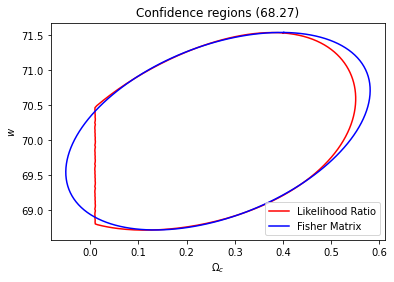

In [6]:
#
#  Creating a new Likelihood ratio test object.
#  First we create two PIndex indicating which parameter
#    we are going to study.
#
p1 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_C)

#p2 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_X)
p2 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.H0)
lhr2d = Ncm.LHRatio2d.new (fit, p1, p2, 1.0e-2)



cr_rg = lhr2d.conf_region (0.6827, 300.0, Ncm.FitRunMsgs.SIMPLE)


fisher_rg = lhr2d.fisher_border (0.6827, 300.0, Ncm.FitRunMsgs.SIMPLE)

cr_p1array = cr_rg.p1.dup_array ()
cr_p2array = cr_rg.p2.dup_array ()

fisher_p1array = fisher_rg.p1.dup_array ()
fisher_p2array = fisher_rg.p2.dup_array ()

#
#  Ploting the confidence regions obtained from both methods.
#

plt.title ("Confidence regions (%.2f)" % (cr_rg.clevel * 100.0))
plt.plot (cr_p1array, cr_p2array, 'r', label="Likelihood Ratio")
plt.plot (fisher_p1array, fisher_p2array, 'b-', label="Fisher Matrix")
plt.xlabel(r'$\Omega_c$')
plt.ylabel(r'$w$')

plt.legend(loc=4)
